In [1]:
import numpy as np
import pandas as pd

# to-do: add today via datetime.

done_movies = [
    'arcane',
    'dune',
    'eternals'
]

tweet_df = pd.DataFrame([])

for movie in done_movies:
    metadata_df = pd.read_json('../dataset/movie-tweets/'+movie+'.json', orient='index')
    is_spam_df = pd.read_excel('../dataset/movie-tweets/'+movie+'-label.xlsx')
    joined_df = pd.concat([metadata_df, is_spam_df], axis=1).drop(['Unnamed: 0', 'tweet'], axis=1)
    tweet_df = tweet_df.append(joined_df).reset_index().drop('index', axis=1)

In [2]:
tweet_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,inferred_text,is-spam
0,2021-11-25 01:16:10+00:00,1463677861764681729,1463677861764681728,RT @yungm3dusa: My Mel Medarda cosplay 🖤 i’m s...,False,"[0, 102]","{'hashtags': [{'text': 'arcane', 'indices': [7...","{'media': [{'id': 1463627942358097923, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,0.0,en,NaN,NaN,None,My Mel Medarda cosplay 🖤 i’m still not over th...,0
1,2021-11-25 01:16:10+00:00,1463677860263120897,1463677860263120896,RT @Snegovski9623: Made a smol gif with my fav...,False,"[0, 108]","{'hashtags': [{'text': 'Arcane', 'indices': [6...","{'media': [{'id': 1463461643833200645, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",...,0,False,False,0.0,en,NaN,NaN,None,Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...,0
2,2021-11-25 01:16:08+00:00,1463677853245919232,1463677853245919232,RT @Meshymayhem: More practice\nhomies I still...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",None,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,0,False,False,NaN,en,NaN,NaN,None,More practice\nhomies I still hate doing full ...,0
3,2021-11-25 01:16:06+00:00,1463677843812929536,1463677843812929536,RT @treker402: Right at it again. \n\n#Arcane ...,False,"[0, 84]","{'hashtags': [{'text': 'Arcane', 'indices': [3...","{'media': [{'id': 1463499779409793033, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,0.0,en,NaN,NaN,None,Right at it again. \n\n#Arcane #piltoversfines...,0
4,2021-11-25 01:16:05+00:00,1463677841900556290,1463677841900556288,self proclaimed free thinkers when arcane jinx...,False,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1463676826291740674, 'id_str...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",...,0,False,False,0.0,en,NaN,NaN,None,self proclaimed free thinkers when arcane jinx...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,2021-11-24 22:55:23+00:00,1463642432281747457,1463642432281747456,Just saw #Eternals and I was really disappoint...,False,"[0, 107]","{'hashtags': [{'text': 'Eternals', 'indices': ...",None,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,NaN,en,NaN,NaN,None,Just saw #Eternals and I was really disappoint...,0
1579,2021-11-24 22:55:21+00:00,1463642421997314048,1463642421997314048,@Jayaeen We want #salt to be a trilogy we want...,False,"[9, 118]","{'hashtags': [{'text': 'salt', 'indices': [17,...",None,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,NaN,en,NaN,NaN,None,@Jayaeen We want #salt to be a trilogy we want...,0
1580,2021-11-24 22:54:53+00:00,1463642306171465728,1463642306171465728,Eternals was so good wtf?!?!?,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions...",None,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,NaN,en,NaN,NaN,None,Eternals was so good wtf?!?!?,0
1581,2021-11-24 22:54:46+00:00,1463642274336751630,1463642274336751616,@heyyoukid415 @ira We want #salt to be a trilo...,False,"[19, 128]","{'hashtags': [{'text': 'salt', 'indices': [27,...",None,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",...,0,False,False,NaN,en,NaN,NaN,None,@heyyoukid415 @ira We want #salt to be a trilo...,0


Things need to be opened:
1. entities -> opened
2. extended_entities -> opened (if any)
3. metadata -> opened
4. user -> opened

In [3]:
# Nested opener
open_candidate = [
    'entities',
    'extended_entities',
    'metadata',
    'user'
]

for attr in open_candidate:
    attr_opened = tweet_df.get(attr).apply(pd.Series).add_prefix(attr+'_')
    tweet_df = pd.concat([tweet_df, attr_opened], axis=1).drop(attr, axis=1)

In [4]:
tweet_df

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,user_profile_text_color,user_profile_use_background_image,user_has_extended_profile,user_default_profile,user_default_profile_image,user_following,user_follow_request_sent,user_notifications,user_translator_type,user_withheld_in_countries
0,2021-11-25 01:16:10+00:00,1463677861764681729,1463677861764681728,RT @yungm3dusa: My Mel Medarda cosplay 🖤 i’m s...,False,"[0, 102]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,000000,False,True,False,False,None,None,None,none,[]
1,2021-11-25 01:16:10+00:00,1463677860263120897,1463677860263120896,RT @Snegovski9623: Made a smol gif with my fav...,False,"[0, 108]","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,000000,False,True,False,False,None,None,None,none,[]
2,2021-11-25 01:16:08+00:00,1463677853245919232,1463677853245919232,RT @Meshymayhem: More practice\nhomies I still...,False,"[0, 139]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,...,333333,True,True,True,False,None,None,None,none,[]
3,2021-11-25 01:16:06+00:00,1463677843812929536,1463677843812929536,RT @treker402: Right at it again. \n\n#Arcane ...,False,"[0, 84]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,333333,True,True,True,False,None,None,None,none,[]
4,2021-11-25 01:16:05+00:00,1463677841900556290,1463677841900556288,self proclaimed free thinkers when arcane jinx...,False,"[0, 54]","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.463677e+18,1.463677e+18,1.316974e+18,...,333333,True,True,True,False,None,None,None,none,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,2021-11-24 22:55:23+00:00,1463642432281747457,1463642432281747456,Just saw #Eternals and I was really disappoint...,False,"[0, 107]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,333333,True,True,True,False,None,None,None,none,[]
1579,2021-11-24 22:55:21+00:00,1463642421997314048,1463642421997314048,@Jayaeen We want #salt to be a trilogy we want...,False,"[9, 118]","<a href=""http://twitter.com/download/iphone"" r...",1.463502e+18,1.463502e+18,1.057937e+18,...,333333,True,False,True,True,None,None,None,none,[]
1580,2021-11-24 22:54:53+00:00,1463642306171465728,1463642306171465728,Eternals was so good wtf?!?!?,False,"[0, 29]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,000000,False,False,False,False,None,None,None,none,[]
1581,2021-11-24 22:54:46+00:00,1463642274336751630,1463642274336751616,@heyyoukid415 @ira We want #salt to be a trilo...,False,"[19, 128]","<a href=""http://twitter.com/download/iphone"" r...",1.246182e+18,1.246182e+18,1.954975e+09,...,333333,True,False,True,True,None,None,None,none,[]


Temporary verdict:
1. entities_hashtags -> hashtag_count (actual hashtags are calculated in text preprocessing)
2. entities_user_mentions -> user_mention_count (usernames aren't important)
3. entities_media -> media_count (same as 2)
4. retweeted_status_user -> open

delete:
1. created_at
2. id
3. id_str
4. full_text,
5. truncated,
6. source',
7. lang (obv its en)
8. quoted_status_id_str
9. in_reply_to_status_id_str', #dup
10. in_reply_to_user_id_str', #dup
11. in_reply_to_screen_name' #redundant
12. extended_entities_media (redundant)
13. metadata_iso_language_code (of course all is en, we put it as a criteria on our earlier tweet search
14. metadata_result_type (all recent, I do not have the historic privilege yet)
15. user_entities (duplicate of user_description and user_url)
16. retweeted_status_* (possible duplicate)

n.b. careful of text stuff vs tabular, the former should be resolved in a recurrent manner while the rest can just be forwarded to SVM and other ML models

In [5]:
tweet_df.describe(include='all')

C:\Users\vin\AppData\Local\Temp/ipykernel_2512/522420988.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweet_df.describe(include='all')


,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,user_profile_text_color,user_profile_use_background_image,user_has_extended_profile,user_default_profile,user_default_profile_image,user_following,user_follow_request_sent,user_notifications,user_translator_type,user_withheld_in_countries
count,1583,1.583000e+03,1.583000e+03,1583,1583,1583,1583,3.530000e+02,3.530000e+02,3.630000e+02,...,1583,1583,1583,1583,1583,0,0,0,1583,1583
unique,1322,NaN,NaN,1568,1,509,45,NaN,NaN,NaN,...,46,2,2,2,2,0,0,0,2,1
top,2021-11-25 01:15:00+00:00,NaN,NaN,@ayosope harry \n#gfvip #tzvip #rosmello #prel...,False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,333333,True,True,True,False,NaN,NaN,NaN,none,[]
freq,5,NaN,NaN,2,1583,213,700,NaN,NaN,NaN,...,1193,1307,1128,1020,1554,NaN,NaN,NaN,1569,1583
first,2021-11-24 22:54:23+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-11-25 01:16:10+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.463666e+18,1.463666e+18,NaN,NaN,NaN,NaN,1.462704e+18,1.462704e+18,5.832484e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.056681e+13,1.056681e+13,NaN,NaN,NaN,NaN,1.176748e+16,1.176748e+16,5.916590e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.463642e+18,1.463642e+18,NaN,NaN,NaN,NaN,1.246182e+18,1.246182e+18,6.424562e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.463657e+18,1.463657e+18,NaN,NaN,NaN,NaN,1.463602e+18,1.463602e+18,3.083359e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(tweet_df.columns)
# Verdict: drop these clear attr:
drop_cand = [
    'created_at',
    'id',
    'id_str',
    'full_text',
    'truncated',
    'source',
    'lang',
    'quoted_status_id_str',
    'extended_entities_media',
    'metadata_iso_language_code',
    'metadata_result_type',
    'user_entities',
    'retweeted_status',
    'in_reply_to_status_id_str', #dup
    'in_reply_to_user_id_str', #dup
    'in_reply_to_screen_name', #redundant
    'in_reply_to_user_id',
    'user_id',
    'user_id_str',
    'user_screen_name',
    'user_url',
    'user_utc_offset',
    'user_time_zone',
    'user_lang',
    'user_profile_background_image_url',
    'user_profile_background_image_url_https',
    'user_profile_image_url',
    'user_profile_image_url_https',
    'user_profile_banner_url',
    'geo',
    'coordinates',
    'contributors',
    'place',
    'user_withheld_in_countries',
    'user_following',
    'user_follow_request_sent',
    'user_notifications'
]

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'possibly_sensitive', 'lang', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'inferred_text', 'is-spam',
       'entities_hashtags', 'entities_symbols', 'entities_user_mentions',
       'entities_urls', 'entities_media', 'extended_entities_media',
       'metadata_iso_language_code', 'metadata_result_type', 'user_id',
       'user_id_str', 'user_name', 'user_screen_name', 'user_location',
       'user_description', 'user_url', 'user_entities', 'user_protected',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_created_at'

In [7]:
tweet_df.drop(drop_cand, axis=1, inplace=True)

In [8]:
tweet_df

,display_text_range,in_reply_to_status_id,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,quoted_status_id,quoted_status,...,user_profile_background_tile,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_has_extended_profile,user_default_profile,user_default_profile_image,user_translator_type
0,"[0, 102]",NaN,False,247,0,False,False,0.0,NaN,None,...,False,19CF86,000000,000000,000000,False,True,False,False,none
1,"[0, 108]",NaN,False,2543,0,False,False,0.0,NaN,None,...,False,981CEB,000000,000000,000000,False,True,False,False,none
2,"[0, 139]",NaN,False,816,0,False,False,NaN,NaN,None,...,False,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,none
3,"[0, 84]",NaN,False,2687,0,False,False,0.0,NaN,None,...,False,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,none
4,"[0, 54]",1.463677e+18,False,0,0,False,False,0.0,NaN,None,...,False,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,"[0, 107]",NaN,False,0,0,False,False,NaN,NaN,None,...,False,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,none
1579,"[9, 118]",1.463502e+18,False,0,0,False,False,NaN,NaN,None,...,False,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,True,none
1580,"[0, 29]",NaN,False,0,0,False,False,NaN,NaN,None,...,False,F58EA8,000000,000000,000000,False,False,False,False,none
1581,"[19, 128]",1.246182e+18,False,0,0,False,False,NaN,NaN,None,...,False,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,True,none


Things need to be changed:
1. display_text_range -> integer
2. in_reply_to_status_id -> is_replying_to_others (bool)
3. quoted_status_id -> is_quoting_status (bool)
4. entities_hashtags -> hashtag_count (int)
5. entities_user_mentions -> user_mention_count (int)
6. entities_media -> media_count
---
7. user_created_at -> age (int, in days subtracted to the scraping date which is 25th November 2021)
8. user_profile_background_color -> rgb (float/quantised)
9. user_profile_link_color -> rgb (float/quantised)
10. user_profile_sidebar_border_color -> rgb (float/quantised)
11. user_profile_sidebar_fill_color -> rgb (float/quantised)
12. user_profile_text_color -> rgb (float/quantised)

In [9]:
# Simple transformations
tweet_df['display_text_range'] = [i[1] - i[0] for i in tweet_df['display_text_range']]
tweet_df['is_replying_to_others'] = [1.0 if not np.isnan(i) else 0.0 for i in tweet_df['in_reply_to_status_id']]
tweet_df['is_quoting_status'] = [1.0 if not np.isnan(i) else 0.0 for i in tweet_df['quoted_status_id']]
tweet_df['hashtag_count'] = [len(i) for i in tweet_df['entities_hashtags']]
tweet_df['user_mention_count'] = [len(i) for i in tweet_df['entities_user_mentions']]
tweet_df['media_count'] = [0 if pd.isnull(i) else len(i) for i in tweet_df['entities_media']]
tweet_df['has_symbols'] = [1.0 if i else 0.0 for i in tweet_df['entities_symbols'].astype(bool)]
tweet_df['has_url'] = [1.0 if i else 0.0 for i in tweet_df['entities_urls'].astype(bool)]
tweet_df['user_is_regular_translator'] = [1.0 if i == 'regular' else 0.0 for i in tweet_df['user_translator_type']]

In [10]:
# Drop previous attr
tweet_df.drop(['display_text_range', 'in_reply_to_status_id', 'quoted_status_id', 'entities_hashtags', 'entities_user_mentions', 'entities_media', 'entities_symbols', 'entities_urls', 'quoted_status', 'favorited', 'retweeted', 'user_protected', 'user_contributors_enabled', 'user_is_translator', 'user_translator_type'], axis=1, inplace=True)

In [11]:
tweet_df['user_profile_background_color_r'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_background_color']])[:, 0]
tweet_df['user_profile_background_color_g'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_background_color']])[:, 1]
tweet_df['user_profile_background_color_b'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_background_color']])[:, 2]
tweet_df['user_profile_link_color_r'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_link_color']])[:, 0]
tweet_df['user_profile_link_color_g'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_link_color']])[:, 1]
tweet_df['user_profile_link_color_b'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_link_color']])[:, 2]
tweet_df['user_profile_sidebar_border_color_r'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_border_color']])[:, 0]
tweet_df['user_profile_sidebar_border_color_g'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_border_color']])[:, 1]
tweet_df['user_profile_sidebar_border_color_b'] = np.array([list(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_border_color']])[:, 2]
tweet_df['user_profile_sidebar_fill_color_r'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_fill_color']])[:, 0]
tweet_df['user_profile_sidebar_fill_color_g'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_fill_color']])[:, 1]
tweet_df['user_profile_sidebar_fill_color_b'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_sidebar_fill_color']])[:, 2]
tweet_df['user_profile_text_color_r'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_text_color']])[:, 0]
tweet_df['user_profile_text_color_g'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_text_color']])[:, 1]
tweet_df['user_profile_text_color_b'] = np.array([tuple(int(i[j:j+2], 16) for j in (0, 2, 4)) for i in tweet_df['user_profile_text_color']])[:, 2]

In [12]:
tweet_df.drop(['user_profile_background_color', 'user_profile_link_color', 'user_profile_sidebar_border_color', 'user_profile_sidebar_fill_color', 'user_profile_text_color'], axis=1, inplace=True)

null analysis:
1. geo
2. coordinates
3. place
4. contributors

value analysis:
1. is_quote_status
2. favorited
3. retweeted
4. possibly_sensitive
5. entities_symbols
6. entities_urls
7. user_protected
8. user_geo_enabled
9. user_verified
10. user_contributors_enabled
11. user_is_translator
12. user_is_translation_enabled
13. user_profile_background_tile
and so much more

In [13]:
tweet_df.describe(include='all')

,is_quote_status,retweet_count,favorite_count,possibly_sensitive,inferred_text,is-spam,user_name,user_location,user_description,user_followers_count,...,user_profile_link_color_b,user_profile_sidebar_border_color_r,user_profile_sidebar_border_color_g,user_profile_sidebar_border_color_b,user_profile_sidebar_fill_color_r,user_profile_sidebar_fill_color_g,user_profile_sidebar_fill_color_b,user_profile_text_color_r,user_profile_text_color_g,user_profile_text_color_b
count,1583,1583.000000,1583.000000,672.000000,1583,1583.000000,1583,1583,1583,1583.000000,...,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
unique,2,NaN,NaN,NaN,1569,NaN,1362,817,1256,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,False,NaN,NaN,NaN,@ayosope harry \n#gfvip #tzvip #rosmello #prel...,NaN,iceage86,,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1487,NaN,NaN,NaN,2,NaN,15,466,144,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,476.835755,0.501579,0.022321,NaN,0.036639,NaN,NaN,NaN,1548.492735,...,205.946936,157.920404,177.597599,186.651927,176.975363,189.429564,194.000632,44.413771,44.202780,43.738471
std,NaN,2502.293351,2.182528,0.147837,NaN,0.187934,NaN,NaN,NaN,7502.344067,...,67.485746,82.878172,91.726000,97.066646,87.103249,93.660663,96.806351,27.715572,27.449919,26.993066
min,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,61.000000,...,194.000000,192.000000,222.000000,237.000000,221.000000,236.000000,236.000000,51.000000,51.000000,51.000000
50%,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,251.000000,...,242.000000,192.000000,222.000000,237.000000,221.000000,238.000000,246.000000,51.000000,51.000000,51.000000
75%,NaN,42.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,884.500000,...,242.000000,192.000000,222.000000,237.000000,221.000000,238.000000,246.000000,51.000000,51.000000,51.000000


In [14]:
tweet_df.describe()

,retweet_count,favorite_count,possibly_sensitive,is-spam,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_statuses_count,is_replying_to_others,...,user_profile_link_color_b,user_profile_sidebar_border_color_r,user_profile_sidebar_border_color_g,user_profile_sidebar_border_color_b,user_profile_sidebar_fill_color_r,user_profile_sidebar_fill_color_g,user_profile_sidebar_fill_color_b,user_profile_text_color_r,user_profile_text_color_g,user_profile_text_color_b
count,1583.000000,1583.000000,672.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1.583000e+03,1583.000000,...,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,476.835755,0.501579,0.022321,0.036639,1548.492735,1068.295641,26.848389,39838.237524,3.612003e+04,0.222994,...,205.946936,157.920404,177.597599,186.651927,176.975363,189.429564,194.000632,44.413771,44.202780,43.738471
std,2502.293351,2.182528,0.147837,0.187934,7502.344067,3639.638157,205.941570,69262.663404,1.129310e+05,0.416386,...,67.485746,82.878172,91.726000,97.066646,87.103249,93.660663,96.806351,27.715572,27.449919,26.993066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,61.000000,178.000000,0.000000,3379.000000,2.187000e+03,0.000000,...,194.000000,192.000000,222.000000,237.000000,221.000000,236.000000,236.000000,51.000000,51.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,251.000000,442.000000,2.000000,14840.000000,9.526000e+03,0.000000,...,242.000000,192.000000,222.000000,237.000000,221.000000,238.000000,246.000000,51.000000,51.000000,51.000000
75%,42.000000,0.000000,0.000000,0.000000,884.500000,1001.000000,10.000000,42969.000000,3.223250e+04,0.000000,...,242.000000,192.000000,222.000000,237.000000,221.000000,238.000000,246.000000,51.000000,51.000000,51.000000
max,60854.000000,57.000000,1.000000,1.000000,189736.000000,128168.000000,6689.000000,720947.000000,3.033024e+06,1.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


Verdict: we still have null values on possibly_sensitive and quoted_status.

In [15]:
tweet_df.isnull().any()

is_quote_status                        False
retweet_count                          False
favorite_count                         False
possibly_sensitive                      True
inferred_text                          False
is-spam                                False
user_name                              False
user_location                          False
user_description                       False
user_followers_count                   False
user_friends_count                     False
user_listed_count                      False
user_created_at                        False
user_favourites_count                  False
user_geo_enabled                       False
user_verified                          False
user_statuses_count                    False
user_is_translation_enabled            False
user_profile_background_tile           False
user_profile_use_background_image      False
user_has_extended_profile              False
user_default_profile                   False
user_defau

In [16]:
tweet_df

,is_quote_status,retweet_count,favorite_count,possibly_sensitive,inferred_text,is-spam,user_name,user_location,user_description,user_followers_count,...,user_profile_link_color_b,user_profile_sidebar_border_color_r,user_profile_sidebar_border_color_g,user_profile_sidebar_border_color_b,user_profile_sidebar_fill_color_r,user_profile_sidebar_fill_color_g,user_profile_sidebar_fill_color_b,user_profile_text_color_r,user_profile_text_color_g,user_profile_text_color_b
0,False,247,0,0.0,My Mel Medarda cosplay 🖤 i’m still not over th...,0,Detavius,"Wherever Shego, I go",Owner of the the Dimmsdale Demon Time Dimmadome,1452,...,134,0,0,0,0,0,0,0,0,0
1,False,2543,0,0.0,Made a smol gif with my fav cupcakes🧁💜❤️\n#Arc...,0,Cristiano #ARCANE SPOILERS,"Rancharia, Brasil",Design - Bauru\n\nIlustrador \n\nhttps://t.co/...,176,...,235,0,0,0,0,0,0,0,0,0
2,False,816,0,NaN,More practice\nhomies I still hate doing full ...,0,Mizi-deloafu🥖,In your Fantazi,Digital multi-fandom artist/fan-artist \nInter...,48,...,242,192,222,237,221,238,246,51,51,51
3,False,2687,0,0.0,Right at it again. \n\n#Arcane #piltoversfines...,0,𝐚𝐣𝐚𝐱 𖤐,lesbian - 19 - they/them,𝘨𝘪𝘳𝘭 𝘨𝘳𝘰𝘶𝘱 𝘦𝘯𝘵𝘩𝘶𝘴𝘪𝘢𝘴𝘵! 💘 𝘰𝘯𝘤𝘦𝘮𝘪𝘥𝘻𝘺𝘪𝘯𝘴𝘰𝘮𝘯𝘪𝘢𝘤𝘰𝘳𝘣...,21,...,242,192,222,237,221,238,246,51,51,51
4,False,0,0,0.0,self proclaimed free thinkers when arcane jinx...,0,Zhyxx,He/Him 17,~Good night~\ni play games\nEsp/Eng\n\npfp: @/...,155,...,242,192,222,237,221,238,246,51,51,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,False,0,0,NaN,Just saw #Eternals and I was really disappoint...,0,Ophelia Butts ( ㅅ ) 💙,"England, United Kingdom","A trans ally, sweet transvestite, part time dr...",4911,...,242,192,222,237,221,238,246,51,51,51
1579,False,0,0,NaN,@Jayaeen We want #salt to be a trilogy we want...,0,iceage86,,,7,...,242,192,222,237,221,238,246,51,51,51
1580,False,0,0,NaN,Eternals was so good wtf?!?!?,0,tin,,what do I call you,258,...,168,0,0,0,0,0,0,0,0,0
1581,False,0,0,NaN,@heyyoukid415 @ira We want #salt to be a trilo...,0,iceage86,,,7,...,242,192,222,237,221,238,246,51,51,51


In [17]:
numeric_df = tweet_df.drop(['inferred_text', 'user_name', 'user_location', 'user_description'], axis=1)
numeric_df.drop('user_created_at', axis=1, inplace=True) # needs further preprocessing
numeric_df.drop('possibly_sensitive', axis=1, inplace=True) # needs imputation from tweets first.

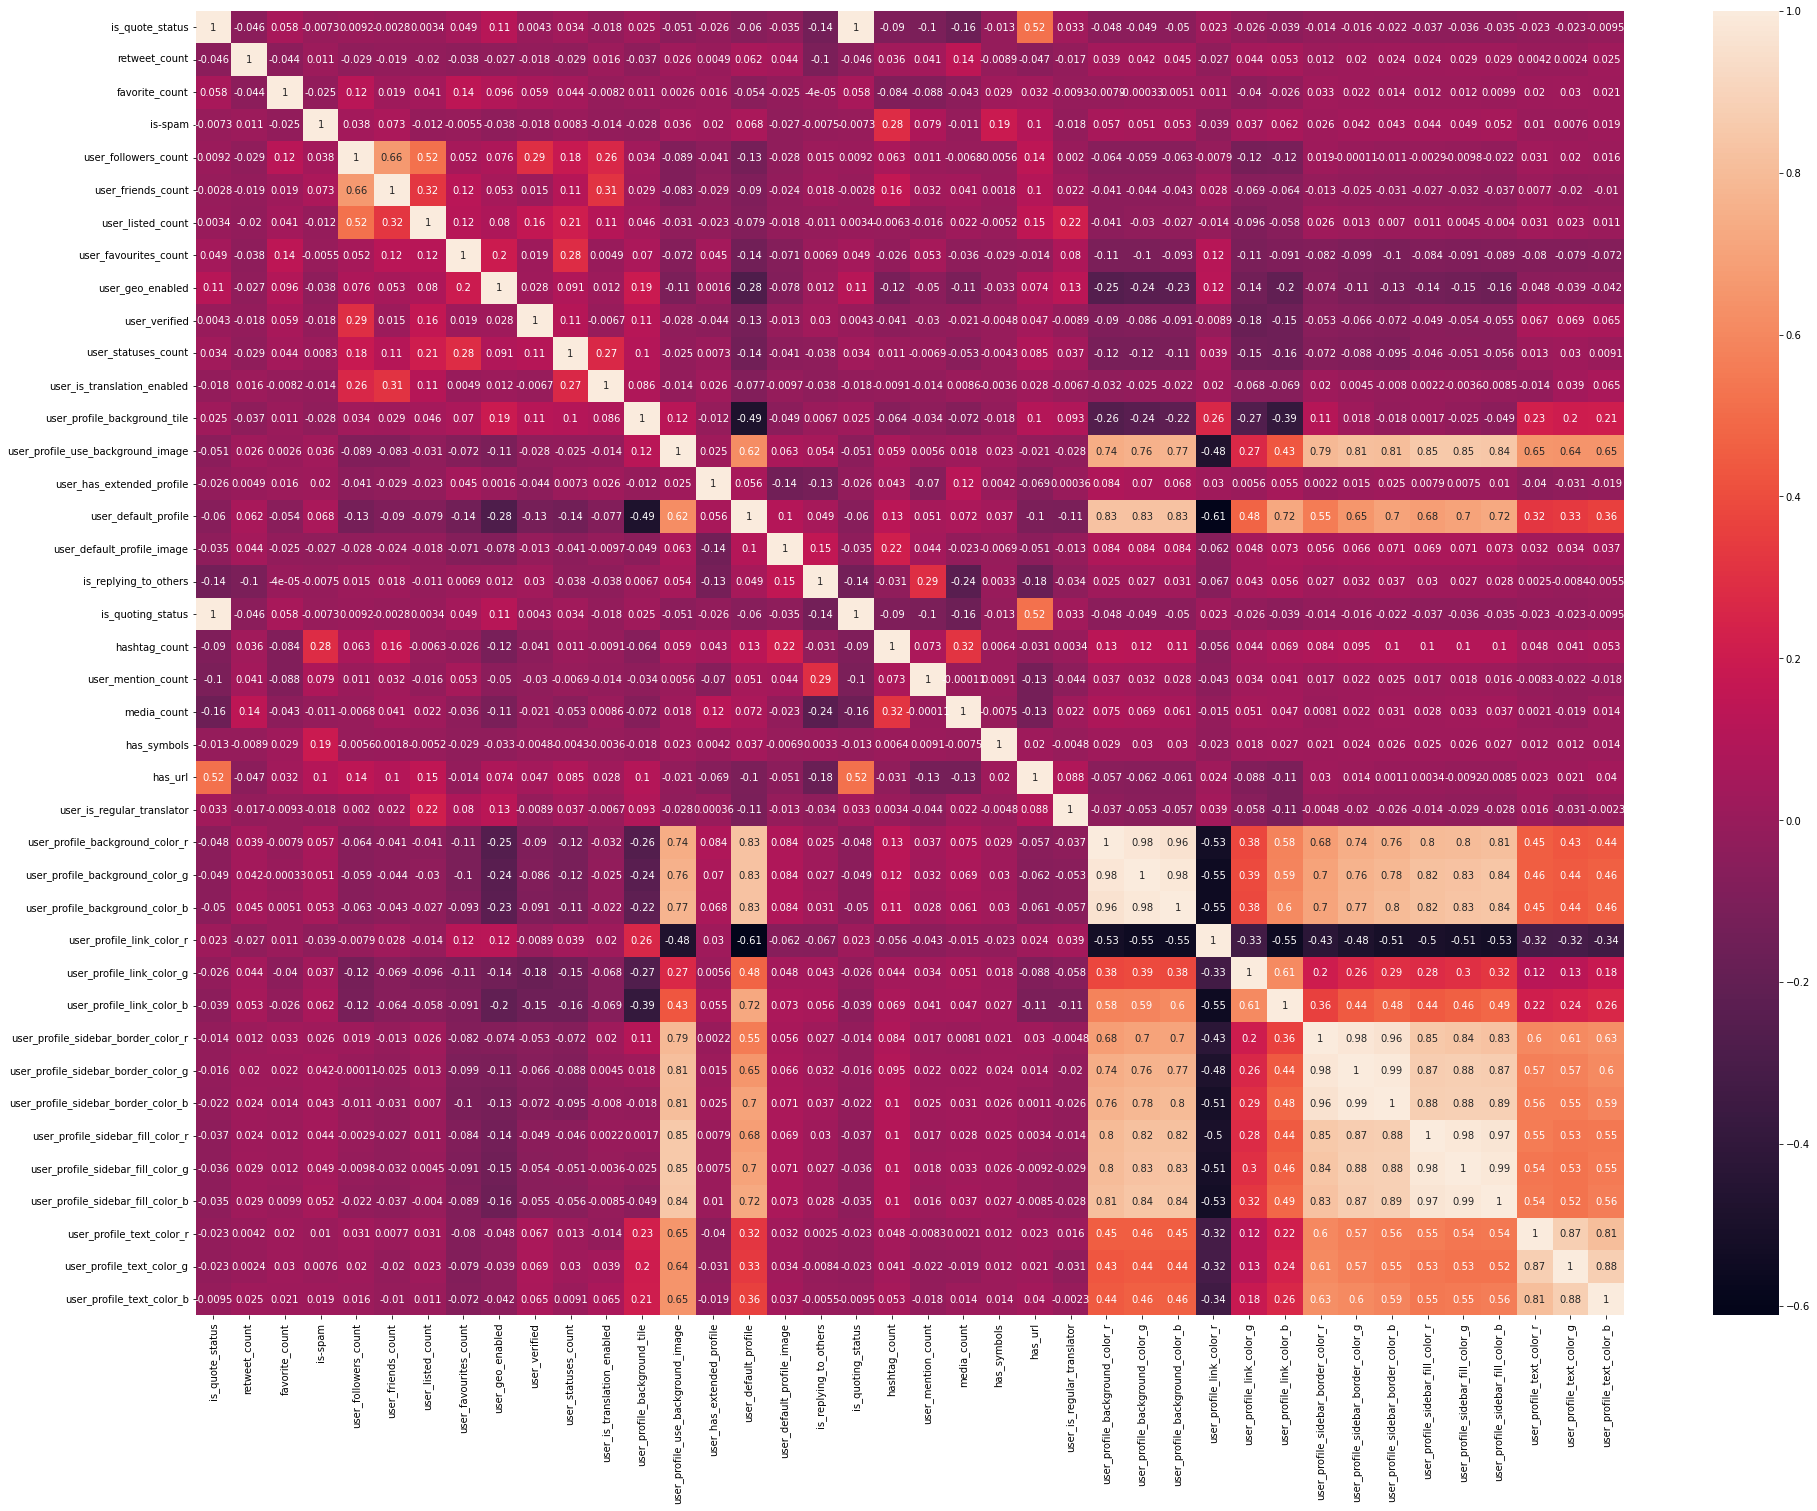

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(32,24))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

To-do:
1. Impute possibly_sensitive from tweet texts

In [19]:
numeric_df.isnull().any()

is_quote_status                        False
retweet_count                          False
favorite_count                         False
is-spam                                False
user_followers_count                   False
user_friends_count                     False
user_listed_count                      False
user_favourites_count                  False
user_geo_enabled                       False
user_verified                          False
user_statuses_count                    False
user_is_translation_enabled            False
user_profile_background_tile           False
user_profile_use_background_image      False
user_has_extended_profile              False
user_default_profile                   False
user_default_profile_image             False
is_replying_to_others                  False
is_quoting_status                      False
hashtag_count                          False
user_mention_count                     False
media_count                            False
has_symbol

In [20]:
# Trying to insert Random Forest algorithm to the data to see which one matters more.
predictors = numeric_df.drop('is-spam', axis=1)
target = numeric_df['is-spam']

from sklearn.ensemble import ExtraTreesClassifier

tree_classifier = ExtraTreesClassifier(n_estimators=50)
tree_classifier = tree_classifier.fit(predictors, target)

In [21]:
tree_classifier.feature_importances_

array([9.62464020e-03, 8.49442080e-02, 1.20183174e-02, 8.96948222e-02,
       1.18502277e-01, 5.05164831e-02, 6.53509278e-02, 2.02262944e-02,
       1.94732868e-04, 8.25150005e-02, 6.77213549e-05, 2.86251645e-03,
       1.32146069e-03, 3.24727948e-02, 5.20342976e-03, 1.48261126e-03,
       2.81978945e-02, 8.94032682e-03, 1.19101543e-01, 6.82382912e-02,
       3.51906338e-02, 3.51546119e-02, 3.85870322e-02, 9.39446315e-07,
       1.01020253e-02, 9.73408271e-03, 1.06736668e-02, 9.45923625e-03,
       1.04248884e-02, 1.38732199e-02, 4.50451851e-03, 1.79246120e-03,
       3.42808865e-03, 2.72729746e-03, 3.43404693e-03, 3.38056253e-03,
       2.14707919e-03, 1.24470244e-03, 2.66461287e-03])

In [24]:
feature_importance_df = pd.DataFrame({
    'feature': predictors.columns,
    'importance': tree_classifier.feature_importances_
})

In [38]:
feature_importance_df.nlargest(14, 'importance')

,feature,importance
18,hashtag_count,0.119102
4,user_friends_count,0.118502
3,user_followers_count,0.089695
1,retweet_count,0.084944
9,user_statuses_count,0.082515
19,user_mention_count,0.068238
6,user_favourites_count,0.065351
5,user_listed_count,0.050516
22,has_url,0.038587
20,media_count,0.035191


Verdict: the following attributes are the best candidates for features:
1. Hashtag count
2. User friends count
3. User followers count
4. Retweet count
5. User statuses count
6. User mention count
7. User favourites count
8. User listed count
9. Has url
10. Media count
11. Has symbols
12. User has extended profile
13. Is replying to others
14. User geo enabled

In [39]:
# Further processing via Orange
numeric_df.to_csv('../dataset/combined-dataset.csv')